# Visualize results
## Installing modules and getting data

The data is now seperated in three different files, with each file representing a month. All data should be in one panda dataframe. 

In [1]:
import pandas as pd
import seaborn as sns
import json
from collections import OrderedDict
import datetime

all_data = dict()

with open("results/output_privacy_data_2021-03-12_18:36:34.203242.json", "r") as file:
    all_data.update(json.load(file))

with open("results/output_privacy_data_2021-03-12_19:08:37.731826.json", "r") as file:
    all_data.update(json.load(file))

with open("results/output_privacy_data_2021-03-12_19:39:59.411008.json", "r") as file:
    all_data.update(json.load(file))

df = pd.DataFrame.from_dict(all_data).transpose()

df = df.sort_index()

# In total I have the data of 90 days. But, I only use 36 days before january 6 and 36 days after (including january 6). This means that february 11 to february 28 are unnecessary and can be removed from the data frame. 

unnecessary_days = [f"2021-02-{day}" for day in range(11, 29)]

df = df.drop(unnecessary_days)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
# This will show the entire dataframe 

df


<ipython-input-1-303f423b323e>:31: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,other,privacy_related
2020-12-01,643214,497
2020-12-02,644193,432
2020-12-03,633974,463
2020-12-04,604816,529
2020-12-05,559260,316
2020-12-06,575226,464
2020-12-07,602425,936
2020-12-08,663404,466
2020-12-09,663698,523
2020-12-10,655611,831


## Using the data

Now all the data I need is in one dataframe. Here I am making percentages of the ratio between privacy and non-privacy tweets and displaying on which day that ratio is the highest.

In [2]:
df["percentage"] = (100/(df["other"]+df["privacy_related"])*df["privacy_related"])

day_most_privacy_tweets = df.nlargest(1, "percentage")

day_most_privacy_tweets

,other,privacy_related,percentage
2021-01-28,751419,3666,0.485508


Here beneath a plot is shown, displaying the value of the ratio on each day. 

<AxesSubplot:>

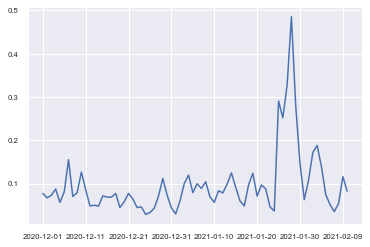

In [3]:
sns.set(font_scale = 0.7)
# Otherwise the text is too big and the text is overlapping

df["percentage"].plot()


## Chi-squared test
This is not going to be calculated in this notebook, but the dataframe needs to adjusted so the values can be entered in the chi-squared test.

In [4]:
df_before = df.head(36)
df_after = df.tail(36)

chi_squared_test_dict = {
    "other_tweets_before": int(df_before["other"].sum()),
    "privacy_tweets_before": int(df_before["privacy_related"].sum()),
    "other_tweets_after": int(df_after["other"].sum()),
    "privacy_tweets_after": int(df_after["privacy_related"].sum())
}

chi_squared_test_dict

{'other_tweets_before': 23494750,
 'privacy_tweets_before': 16528,
 'other_tweets_after': 28000903,
 'privacy_tweets_after': 34996}

In [5]:
file_name = f"results/chi_squared_test_file_{datetime.datetime.now()}".replace(" ", "_")
with open(file_name, "w") as file:
    file.write(json.dumps(chi_squared_test_dict))